In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
athlete_events = pd.read_csv(r"C:\Users\antho\OneDrive\Υπολογιστής\Ανθούλα\projects\sql\Learn SQL Basics for Data Science Specialization\4. SQL for Data Science Capstone Project\SportsStats\athlete_events.csv")
noc_regions = pd.read_csv(r"C:\Users\antho\OneDrive\Υπολογιστής\Ανθούλα\projects\sql\Learn SQL Basics for Data Science Specialization\4. SQL for Data Science Capstone Project\SportsStats\noc_regions.csv")

In [3]:
#check data types

athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
#count null values for each column

display(athlete_events.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
#delete duplicated rows based on ID, Event and Games

athlete_events = athlete_events.drop_duplicates(subset = ['ID', 'Event', 'Games'], keep = 'first')

In [7]:
#print the first and the last year of Olympic Games

print("First Games: ", athlete_events.Year.min())
print("Last Games: ", athlete_events.Year.max())

First Games:  1896
Last Games:  2016


In [8]:
from pandasql import sqldf
myquery = lambda q: sqldf(q, globals())
myquery('SELECT * FROM athlete_events')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269631,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
269632,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
269633,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
269634,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [9]:
#find and make a new column of country of each athlete

athlete_events = myquery('''SELECT athlete_events.*, noc_regions.region AS Country
                            FROM athlete_events LEFT JOIN noc_regions ON athlete_events.NOC = noc_regions.NOC''')

In [10]:
#calculate the number of Summer an Winter Games and the average number of athletes take part in each of these Games

myquery('''SELECT
           Season,
           COUNT(DISTINCT(Games)) AS games,
           COUNT(DISTINCT(ID))/COUNT(DISTINCT(Games)) AS average_athletes
           FROM athlete_events
           GROUP BY Season''')

,Season,games,average_athletes
0,Summer,29,4026
1,Winter,22,861


In [11]:
#calculate the 5 first sport with more participations of athletes

myquery('''SELECT Sport, COUNT(DISTINCT(ID)) as participants
           FROM athlete_events
           GROUP BY Sport
           ORDER BY participants DESC
           LIMIT 5''')

,Sport,participants
0,Athletics,22071
1,Swimming,8765
2,Rowing,7687
3,Football,6161
4,Cycling,5819


In [12]:
#find the athlete with the most medals in Games

myquery('''SELECT Name, Sport, MAX(count_medals) as max_medals
           FROM (SELECT Name, Sport, COUNT(*) as count_medals
                 FROM athlete_events
                 WHERE Medal IS NOT NULL
                 GROUP BY ID)''')

,Name,Sport,max_medals
0,"Michael Fred Phelps, II",Swimming,28


In [13]:
#find the athlete with the most medals in a Game

myquery('''SELECT Name, Games, Sport, MAX(count_medals) as max_medals
           FROM (SELECT ID, Name, Sport, Games, COUNT(*) as count_medals
                 FROM athlete_events
                 WHERE Medal IS NOT NULL
                 GROUP BY ID, Games)''')

,Name,Games,Sport,max_medals
0,Aleksandr Nikolayevich Dityatin,1980 Summer,Gymnastics,8


In [14]:
#calculate some stats of athletes by sex

myquery('''SELECT Sex,
           COUNT(DISTINCT(ID)) AS athletes,
           COUNT(DISTINCT(ID))*100.0/SUM(COUNT(DISTINCT(ID))) OVER() AS total_percentage,
           AVG(Age) AS average_age
           FROM athlete_events
           GROUP BY Sex''')

,Sex,athletes,total_percentage,average_age
0,F,33981,25.065095,23.697245
1,M,101590,74.934905,26.148658


In [15]:
#some stats seperately for women and men through the years, for Summer Games

myquery('''SELECT Sex, Games,
           COUNT(DISTINCT(ID)) AS athletes,
           COUNT(DISTINCT(ID))*100.0/SUM(COUNT(DISTINCT(ID))) OVER(PARTITION BY Games) AS total_percentage,
           AVG(Age) AS average_age
           FROM athlete_events
           WHERE Season = "Summer"
           GROUP BY Sex, Games
           ORDER BY Games
           LIMIT 60''')

,Sex,Games,athletes,total_percentage,average_age
0,M,1896 Summer,176,100.000000,23.580645
1,F,1900 Summer,23,1.879085,29.695652
2,M,1900 Summer,1201,98.120915,28.703494
3,F,1904 Summer,6,0.923077,50.230769
4,M,1904 Summer,644,99.076923,26.396450
5,F,1906 Summer,6,0.713436,23.500000
6,M,1906 Summer,835,99.286564,27.139959
7,F,1908 Summer,44,2.173913,33.897436
8,M,1908 Summer,1980,97.826087,26.887866
9,F,1912 Summer,53,2.200083,22.379310


In [16]:
#for Winter Games

myquery('''SELECT Sex, Games,
           COUNT(DISTINCT(ID)) AS athletes,
           COUNT(DISTINCT(ID))*100.0/SUM(COUNT(DISTINCT(ID))) OVER(PARTITION BY Games) AS total_percentage,
           AVG(Age) AS average_age
           FROM athlete_events
           WHERE Season = "Winter"
           GROUP BY Sex, Games
           ORDER BY Games
           LIMIT 45''')

,Sex,Games,athletes,total_percentage,average_age
0,F,1924 Winter,13,4.153355,25.625000
1,M,1924 Winter,300,95.846645,27.671835
2,F,1928 Winter,28,6.073753,26.178571
3,M,1928 Winter,433,93.926247,26.605603
4,F,1932 Winter,21,8.333333,22.571429
5,M,1932 Winter,231,91.666667,25.750000
6,F,1936 Winter,80,11.976048,22.802469
7,M,1936 Winter,588,88.023952,25.275218
8,F,1948 Winter,77,11.526946,22.834586
9,M,1948 Winter,591,88.473054,26.721748


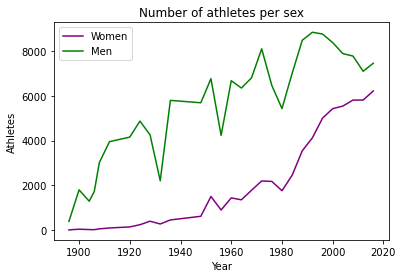

In [17]:
#create a line chart with participation of each sex through years

sexes1 = myquery('''SELECT Year,
                    SUM(CASE WHEN (Sex = "F" AND Season = "Summer") THEN 1 ELSE 0 END) AS women,
                    SUM(CASE WHEN (Sex = "M" AND Season = "Summer") THEN 1 ELSE 0 END) AS men
                    FROM athlete_events
                    GROUP BY Year
                    HAVING Men <> 0''')

plt.plot(sexes1.Year, sexes1.women, color="purple")
plt.plot(sexes1.Year, sexes1.men, color="green")
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.title('Number of athletes per sex')
plt.legend(["Women", "Men"])
plt.show()


In [18]:
#calculate the number of events and athletes for each Game and Season

summer_stats = myquery('''SELECT Year, COUNT(DISTINCT(Event)) AS events, COUNT(DISTINCT(ID)) as athletes
                          FROM athlete_events
                          WHERE Season = "Summer"
                          GROUP BY Year
                          ORDER BY Year''')

In [19]:
winter_stats = myquery('''SELECT Year, COUNT(DISTINCT(Event)) AS events, COUNT(DISTINCT(ID)) as athletes
                          FROM athlete_events
                          WHERE Season = "Winter"
                          GROUP BY Year
                          ORDER BY Year''')

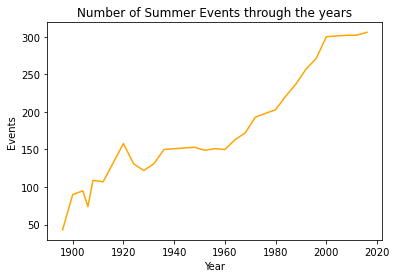

In [20]:
#create a line chart with number of athletes per Game through the years, for Summer Games

plt.plot(summer_stats.Year, summer_stats.events, color="orange")
plt.xlabel('Year')
plt.ylabel('Events')
plt.title('Number of Summer Events through the years')
plt.show()


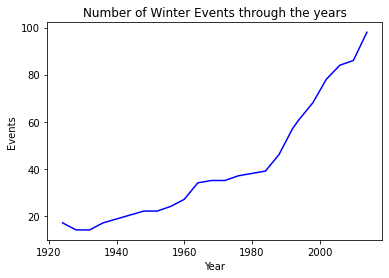

In [21]:
#for Winter Games

plt.plot(winter_stats.Year, winter_stats.events, color="blue")
plt.xlabel('Year')
plt.ylabel('Events')
plt.title('Number of Winter Events through the years')
plt.show()


In [22]:
#number of Games in which takes part each athlete

myquery('''SELECT games_per_id, COUNT(ID) as athletes
           FROM (SELECT ID, COUNT(DISTINCT(Games)) as games_per_id
                 FROM athlete_events
                 GROUP BY ID)
            GROUP BY games_per_id
            ORDER BY games_per_id''')

,games_per_id,athletes
0,1,98450
1,2,26198
2,3,8051
3,4,2146
4,5,545
5,6,139
6,7,30
7,8,9
8,9,2
9,10,1


In [23]:
#average number of Games in which athletes take part

myquery('''SELECT AVG(games_per_id) as average_games_per_athlete
           FROM (SELECT ID, COUNT(DISTINCT(Games)) as games_per_id
                 FROM athlete_events
                 GROUP BY ID)''')

,average_games_per_athlete
0,1.382685


In [24]:
#calculate the number of medals per age

age_medals = myquery('''SELECT
                        Age,
                        SUM(CASE WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS medals
                        FROM athlete_events
                        GROUP BY Age
                        ORDER BY Age''')

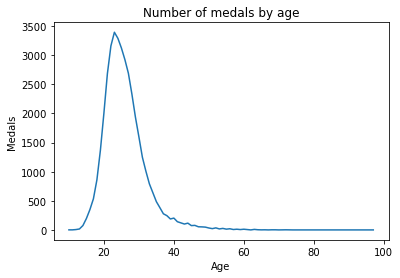

In [25]:
#create a line chart for medals per age

plt.plot(age_medals.Age, age_medals.medals)
plt.xlabel('Age')
plt.ylabel('Medals')
plt.title('Number of medals by age')
plt.show()


In [26]:
#calculate number of athletes and medals by age groups

myquery('''SELECT
           a.age_group,
           COUNT(*) AS athletes,
           SUM(CASE WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS medals
           FROM (SELECT Medal,
                 CASE WHEN Age < 18 THEN '<18'
                      WHEN Age BETWEEN 18 AND 25 THEN '18-25'
                      WHEN Age BETWEEN 26 AND 33 THEN '26-33'
                      WHEN Age BETWEEN 34 AND 40 THEN '34-40'
                      WHEN Age BETWEEN 41 AND 55 THEN '41-55'
                      WHEN Age > 56 THEN '>56'
                      END age_group
                 FROM athlete_events) a
           GROUP BY a.age_group''')

,age_group,athletes,medals
0,None,9397,738
1,18-25,138264,19883
2,26-33,87128,14533
3,34-40,15607,2418
4,41-55,6151,931
5,<18,12503,1178
6,>56,586,66


In [27]:
#calculate the average age for each of the type of medals

myquery('''SELECT Medal, AVG(Age) average_age
           FROM athlete_events
           WHERE Medal IS NOT NULL
           GROUP BY Medal''')

,Medal,average_age
0,Bronze,25.868980
1,Gold,25.899629
2,Silver,25.988212


In [28]:
#calculate the first ten countries with the most medals and their performance in Summer and Winter Games

medals = myquery('''SELECT
                    Country,
                    SUM(CASE WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS count_medals,
                    SUM(CASE WHEN (Medal IS NOT NULL AND Season = "Summer") THEN 1 ELSE 0 END) AS summer_medals,
                    SUM(CASE WHEN (Medal IS NOT NULL AND Season = "Winter") THEN 1 ELSE 0 END) AS winter_medals,
                    SUM(CASE WHEN Medal = "Gold" THEN 1 ELSE 0 END) AS gold_medals,
                    SUM(CASE WHEN Medal = "Silver" THEN 1 ELSE 0 END) AS silver_medals,
                    SUM(CASE WHEN Medal = "Bronze" THEN 1 ELSE 0 END) AS bronze_medals
                    FROM athlete_events
                    GROUP BY Country
                    ORDER BY count_medals DESC
                    LIMIT 10''')

medals

,Country,count_medals,summer_medals,winter_medals,gold_medals,silver_medals,bronze_medals
0,USA,5636,5001,635,2638,1641,1357
1,Russia,3947,3188,759,1599,1170,1178
2,Germany,3756,3126,630,1301,1195,1260
3,UK,2067,1984,83,677,739,651
4,France,1747,1597,150,497,595,655
5,Italy,1637,1446,191,575,531,531
6,Sweden,1536,1108,428,479,522,535
7,Canada,1352,741,611,463,438,451
8,Australia,1349,1333,16,368,459,522
9,Hungary,1135,1123,12,432,332,371


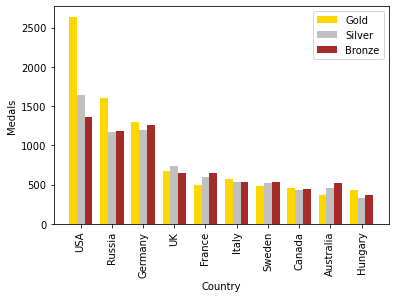

In [29]:
#create a bar chart for the first ten countries in total medals, divided by type of medal

x = np.arange(10)
width = 0.25

plt.bar(x-0.25, medals.gold_medals, width, color='gold')
plt.bar(x, medals.silver_medals, width, color='silver')
plt.bar(x+0.25, medals.bronze_medals, width, color='brown')
plt.xticks(x, medals.Country, rotation=90)
plt.xlabel("Country")
plt.ylabel("Medals")
plt.legend(["Gold", "Silver", "Bronze"])
plt.show()


In [30]:
#find if there are countries without medals

myquery('''SELECT
           Country,
           SUM(CASE WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS count_medals
           FROM athlete_events
           GROUP BY Country
           ORDER BY count_medals ASC''')

,Country,count_medals
0,Albania,0
1,American Samoa,0
2,Andorra,0
3,Angola,0
4,Antigua,0
...,...,...
201,France,1747
202,UK,2067
203,Germany,3756
204,Russia,3947
